# Simple ML introducion

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This notebook wants to implement simple Machine Learning algorithms

In [1]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

TODO:

Add Overfitting, Underfitting, train test split and cross-validation as necessary tools

## Regression

Como vimos, la idea de Regresion Lineal es modelar

$$y(x,w)=w_{0}+w_{1}x$$

De manera tal que 

$$t\sim \mathcal{N}(y(x,w),\sigma^{2})$$

Con alguna incerteza que no nos importa demasiado hoy.

Aca tenemos la gran ventaja de que sabemos la verdadera funcion que sigue el target. En la vida real, casi nunca sabemos la verdadera funcion.

In [2]:
N_SAMPLES = 20
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)
t =  4 * x+ np.sin(x*6)+ 0.5*np.random.randn(N_SAMPLES,1)

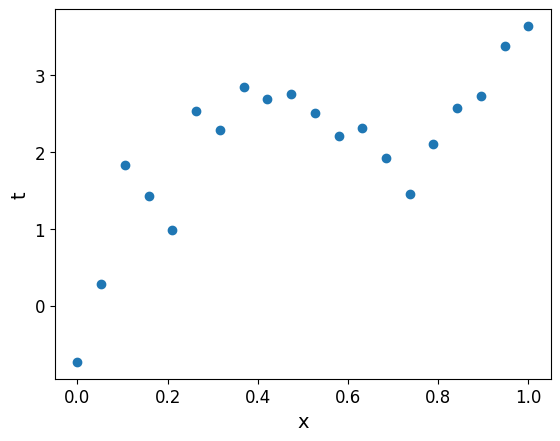

In [3]:
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [4]:
def y_true(x):
  return  4 * x+ np.sin(x*6)

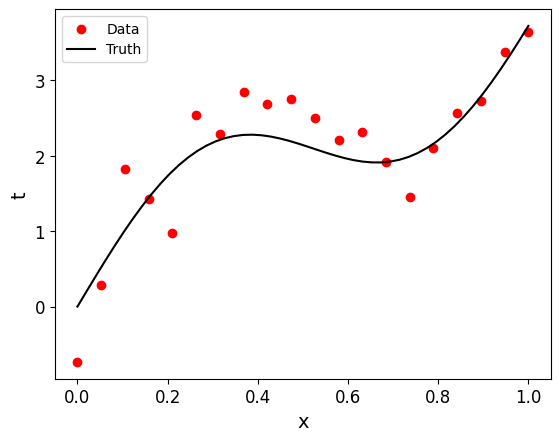

In [7]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

$$y(x_{i},\vec{w})=w_{0}1+w_{1}x_{i}$$

$$\phi_{0}(x)=1$$

$$\phi_{1}(x)=x$$

$$y(x_{i},\vec{w})=w_{0}\phi_{0}(x_{i})+w_{1}\phi_{1}(x_{i})$$

$$y(x_{i},\vec{w})=\vec{w}^{T}\cdot\vec{\phi}(x_{i})$$

$$\vec{w}^{T}=(w_{0},w_{1})$$

$$\vec{\phi}^{T}(x_{i})=(\phi_{0}(x_{i}),\phi_{1}(x_{i}))$$

$$y^{T}=(y_{1},y_{2},...,y_{N})$$

$$y=\Phi\cdot\vec{w}$$

Si queremos obtener los estimador de maxima verosimilitud de los pesos $w_{0}$, $w_{1}$, tenemos que resolver las ecuaciones normales

$$w_{ML}=(\Phi^{T}\Phi)^{-1}\Phi^{T}t$$

Donde $w_{ML}=(w_{0,ML},w_{1,ML})^{T}$, $t$ el vector de target y $\Phi$ es la matriz de diseño. En cada columna, tiene una de las funciones de base. En este caso, 1 y x. En cada fila, tiene una medicion

Si tenemos M funciones de base y N mediciones, 

$w_{ML}$ es una matriz de $M \text{ x } 1 $

$\Phi$ es una matriz de $N \text{ x } M$

$t$ es una matriz de $N \text{ x } 1$ 

In [10]:
Phi=np.vstack([np.ones(len(x)),x[:,0]]).T # agrupo 1s y xs para cada medicion
print(Phi.shape)

(20, 2)


Las ecuaciones normales tienen una inversa ahi metida. Eso no es numericamente muy deseable. Conviene resolver la ecuacion

$$(\Phi^{T}\Phi)w_{ML}=\Phi^{T}t$$

y utilizar `np.linalg.solve(A,b)` que obtiene el vector $X$ solucion de la ecuacion

$$Ax=b$$



In [11]:
A=np.dot(Phi.T,Phi)
b=np.dot(Phi.T,t)
wML=np.linalg.solve(A,b)

Veamos la solucion

In [12]:
wML

array([[0.94478638],
       [2.27705522]])

Podemos graficar esta solucion facilmente

In [13]:
def y_ML(x,wML):
  return wML[0]+wML[1]*x

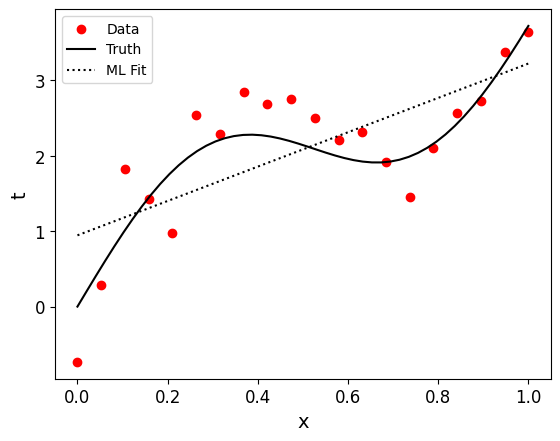

In [15]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth')
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Obviamente, no funciona muy bien... Pero hay que cuantificarlo!

In [16]:
def rmse(t,y):
    return np.sqrt(np.mean((t-y)**2))

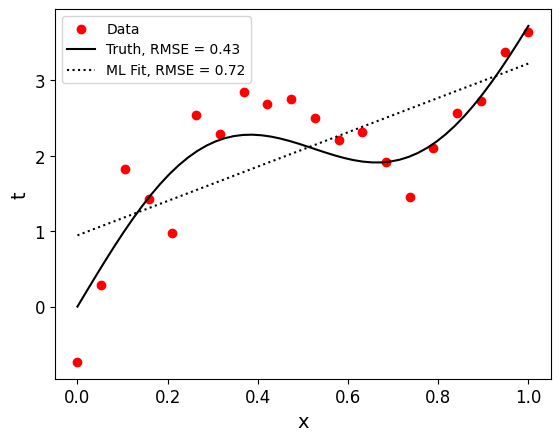

In [21]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t,y_true(x)),2)))
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t,y_ML(x,wML)),2)))
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Text(0.5, 1.0, 'Residuals')

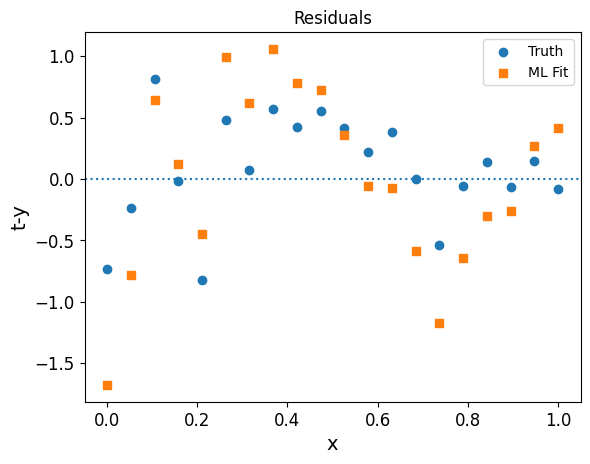

In [27]:
plt.scatter(x,t-y_true(x),marker='o',label='Truth')
plt.scatter(x,t-y_ML(x,wML),marker='s',label='ML Fit')
plt.axhline(0.0,linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('t-y')
plt.title('Residuals')

### Ejercicio

Resuelvan las ecuaciones normales, pero ahora modelando la funcion como

$$y(x_{i},w)=w_{0}+\sum_{d=1}^{5}w_{d}x^{d}_{i}$$

In [28]:
Phi=np.vstack([np.ones(len(x)),x[:,0],x[:,0]**2,x[:,0]**3,x[:,0]**4,x[:,0]**5]).T#[1.0 x x2 x3 x4 x5]

In [29]:
Phi.shape

(20, 6)

In [30]:
print(x[0],Phi[0])

[0.] [1. 0. 0. 0. 0. 0.]


In [31]:
Phi=np.asarray([x[:,0]**m for m in range(6)]).T

In [32]:
Phi.shape

(20, 6)

In [33]:
A=np.dot(Phi.T,Phi)
b=np.dot(Phi.T,t)
wML=np.linalg.solve(A,b)

In [34]:
wML

array([[ -0.50304974],
       [ 15.04500536],
       [ -7.42706505],
       [-52.72031158],
       [ 75.1349298 ],
       [-25.70869334]])

In [35]:
def y_ML(x,wML):
  return wML[0]*(x**0)+wML[1]*x+wML[2]*(x**2)+wML[3]*(x**3)+wML[4]*(x**4)+wML[5]*(x**5) 

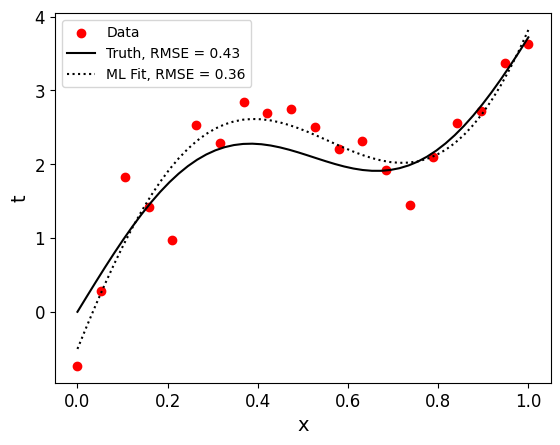

In [36]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t,y_true(x)),2)))
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t,y_ML(x,wML)),2)))
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

### Overfitting!

In [38]:
rmse(t,y_ML(x,wML))

np.float64(0.3605491603448692)

### `sklearn` ?

## Classification

Estamos interesandos en problemas de clasificación en el que queremos aprender a asignar una clase $\mathcal{C}_{k}$ a un dato $x$ teniendo como datos de entrenamiento un conjunto etiquetado $x_{\text{train}},t_{\text{train}}$

La clase pasada vimos el **Perceptron**. Este clasificador nos provee una **función discriminante** $y(x,w)$ que separa a las clases. Es decir, $y$ tiene incluida una decisión sobre la clase a la que pertenece $x$.

Hoy vamos a ver un enfoque **discriminativo**. Nuestro modelo busca aprender

$$p(\mathcal{C}_{k}|x)$$

En este enfoque no intentamos modelar priors, verosimilitud y evidencia. Nos concentramos directamente en el **posterior**. Ahora, nuestra función $y(x,w)$ decide automaticamente la clase a la que pertenece $x$. Con el posterior a mano, tenemos que implementar la **teoría de la decisión** para asignar un valor de $t$.

Para el problema binario, sólo necesitamos modelar $p(\mathcal{C}_{1}|x)$ ya que $p(\mathcal{C}_{2}|x)=1-p(\mathcal{C}_{1}|x)$. Para el problema multiclase, si necesitamos modelar las $K$ distribuciones posteriores.

Para el caso binario, podemos hacer la siguiente cuenta

$$p(\mathcal{C}_{1}|x)=\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})+p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\frac{1}{1+\frac{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}}$$

Si tomamos $a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}$

$$p(\mathcal{C}_{1}|x)=\frac{1}{1+\text{e}^{-a}}=\sigma(a)$$

$\sigma(a)$ es la **función sigmoide**.

Si inspeccionamos $a$ un poco mas, vemos que 

$$a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\text{Ln }\frac{p(\mathcal{C}_{1}|x)}{p(\mathcal{C}_{2}|x)}$$

es el logaritmo del cociente entre probabilidades. Entonces, utilizando la sigmoide, podemos prescindir de la verosimilitud y del prior, considerando unicamente los posteriores.

Text(0.5, 0, 'Log odds')

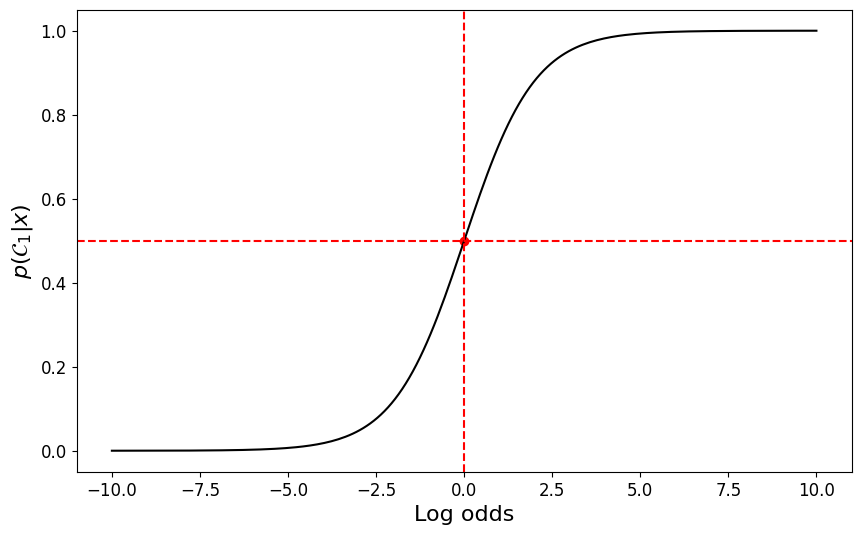

In [39]:
prob = np.linspace(-10, 10, 200)

a_vals = 1 / (1 + np.exp(-prob))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(prob, a_vals, color='black')
ax.scatter(0.0, 0.5, color='red')
ax.axvline(0.0, linestyle="dashed",color='red')
ax.axhline(0.5, linestyle="dashed",color='red')
ax.set_ylabel(r'$p(\mathcal{C}_{1}|x)$', fontsize=16)
ax.set_xlabel('Log odds', fontsize=16)

Vemos que si bien el cociente de probabilidades toma valores entre $-\infty$ y $\infty$, la función sigmoide tiene valores entre 0 y 1, que puede interpretarse como una probabilidad.

En particular, cuando el cociente de probabilidades da uno, la sigmoide da 0.5 (como tiene que dar!).

La sigmoide tiene dos propiedades útiles:

$$\sigma(-a)=1-\sigma(a)$$

y

$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$


Para el caso de K clases, consideramos la siguiente generalización

$$p(\mathcal{C}_{k}|x)=\frac{p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})}{\sum_{l=1}^{K}p(x|\mathcal{C}_{l})p(\mathcal{C}_{l})}=\frac{e^{a_{k}}}{\sum_{l=1}^{K}e^{a_{l}}}$$

con $a_{k}=\text{Ln }p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})$

Esta función se conoce como la exponencial normalizada o **softmax**.


**Regresión Logística**

Vamos a considerar ahora la **Regresión Logística**. Para dos clases, modelamos el posterior como

$$p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$$

Fijense como, al igual que para el Perceptron, introducimos una función de activación no lineal. Sin embargo, esta función de activación es distinta y garantiza que obtengamos un número entre 0 y 1, tal como debe ser una probabilidad. Que utilicemos la sigmoide para lograrlo esta motivado en el truco que vimos en la sección anterior pero es ahora una elección de modelado, no un resultado de hacer inferencia.

Acá $\vec{\phi}$ vuelve a incluir $\phi_{0}(\vec{x})=1$.

Para muchos datos, agrupo

$$\Phi=\begin{pmatrix}\vec{\phi}^{T}(\vec{x}_{1}) \\ ... \\ \vec{\phi}^{T}(\vec{x}_{N})\end{pmatrix}$$

$\sigma(\Phi\cdot \vec{w}) = \begin{pmatrix}\sigma(\vec{\phi}^{T}(\vec{x}_{1}) \cdot\vec{w})\\ ... \\ \sigma(\vec{\phi}^{T}(\vec{x}_{N})\cdot\vec{w})\end{pmatrix}=\begin{pmatrix}\sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{1}))^T)\\ ... \\ \sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{N}))^T)\end{pmatrix}=\begin{pmatrix}y(\vec{x}_{1},\vec{w})\\ ... \\ y(\vec{x}_{N},\vec{w})\end{pmatrix}$

Necesitamos decidir la función de error adecuada para el problema y definir un algoritmo para minimizar dicha función.

Podemos encontrarla como hicimos para fundamentar cuadrados mínimos: escribiendo la verosimilitud.

$t$ es una variable binaria, con valores exito o fracaso. 
Para una única medición, la verosimilitud $p(\text{t}|\vec{x},\vec{w})$ es entonces una Bernoulli $p(t|\mu)=\mu^{t}(1-\mu)^{1-t}$ con $\mu$ la probabilidad de éxito. ¿Cuál es dicha probabilidad de éxito? Justamente es lo que queremos obtener, $p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})$.

Entonces para un dataset $\vec{x}_{n}$, con $n=1,..,N$ la verosimilitud es

$p(\text{T}|X,\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$

donde $y_{n}=y(x_{n},\vec{w})$. Tomando el el logaritmo

$\text{Ln }p(\text{T}|\vec{w})=\sum_{n=1}^{N}(t_{n}\text{Ln }y_{n}+(1-t_{n})\text{Ln }(1-y_{n}))$

Aplicando un signo menos, llegamos a la función de error que nos interesa, y que vamos a usar muchisimo: la entropía cruzada o **cross-entropy**

$$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\text{ln}y_{n}+(1-t_{n})\text{ln}(1-y_{n}))$$

Dado que $t_{n}=\{0,1\}$, la función de error hace lo siguiente

Si $t_{n}=1$, tiene en cuenta $\text{Ln }y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 1 para minimizar el error.

Si $t_{n}=0$, tiene en cuenta $\text{Ln }1-y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 0 para minimizar el error.

Es decir, hace lo que tiene que hacer. Recordemos que $y_{n}$ no es $t_{n}$ sino que es $p(t_{n}|\vec{x}_{n},\vec{w})$.

Minimizar esta función de error es más díficil que minimizar la de cuadrados mínimos debido a la presencia de los logaritmos. Sin embargo, podemos definir un algoritmo iterativo para encontrar los $\vec{w}$, el Iterative Reweighted Least Squares o IRLS. Este algoritmo utiliza una actualización de Newton-Ralphson:

$\vec{w}^{\text{nuevo}}=\vec{w}^{\text{viejo}}-\text{H}^{-1}\nabla E(\vec{w})$

Donde $\nabla E(\vec{w})$ es el gradiente del error y $\text{H}$ es la matriz Hessiana. Para la regresión logística, uno puede llegar a sus propias ecuaciones normales _iterativas_ aprovechando las propiedades de la sigmoide

$\vec{w}^{\text{nuevo}}=(\text{$\Phi$}^{T}\text{R}\text{$\Phi$})^{-1}\text{$\Phi$}^{T}\text{R}\text{z}$

Con $\Phi$ la matriz de diseño, $\text{R}$ la matriz diagonal cuyos elementos son $y_{n}(1-y_{n})$ y $\text{z}$ es un vector que se calcula como:

$\text{z}=\text{$\Phi$}\vec{w}^{\text{viejo}}-\text{R}^{-1}(\text{Y}-\text{T})$

Con $\text{Y}$ e $\text{T}$ los vectores de predicciones y respuestas respectivamente. Noten que los pesos entran varias veces: en la matriz $\text{R}$, en el vector $\text{Y}$ y explicitamente en $\text{z}$. Es por esto que es iterativo.


Este algoritmo también puede aplicarse al caso de regresión lineal, viendo que el algoritmo de Newton-Raphson converge a la solución cerrada en 1 paso. La diferencia acá es la función de activación sigmoide. Además, quiero enfatizar que este algoritmo es iterativo pero no es secuencial, ya que utiliza todos los datos del dataset.

Como mencionamos la clase pasada, y vamos a ver en detalle la clase que viene, necesitamos decidir cuando asignar una medición a una clase.

Para el caso binario, podemos tomar el criterio que $x\in\mathcal{C}_1$ si

$$p(\mathcal{C}_{1}|x)\geq p(\mathcal{C}_{2}|x)$$

Dado que tenemos probabilidades que suman uno, este criterio pone la **frontera de decisión** en

$$p(\mathcal{C}_{1}|x)=0.5$$

Puede mostrarse que esta elección de frontera de decisión maximiza la **exactitud** o **accuracy**

$$\text{Exactitud = }\frac{\text{VP}+\text{VN}}{\text{VP}+\text{FP}+\text{VN}+\text{FN}}$$

Es decir, minimizamos la cantidad de **errores totales** (que no es lo mismo que minimizar la entropía cruzada).



In [71]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-3, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


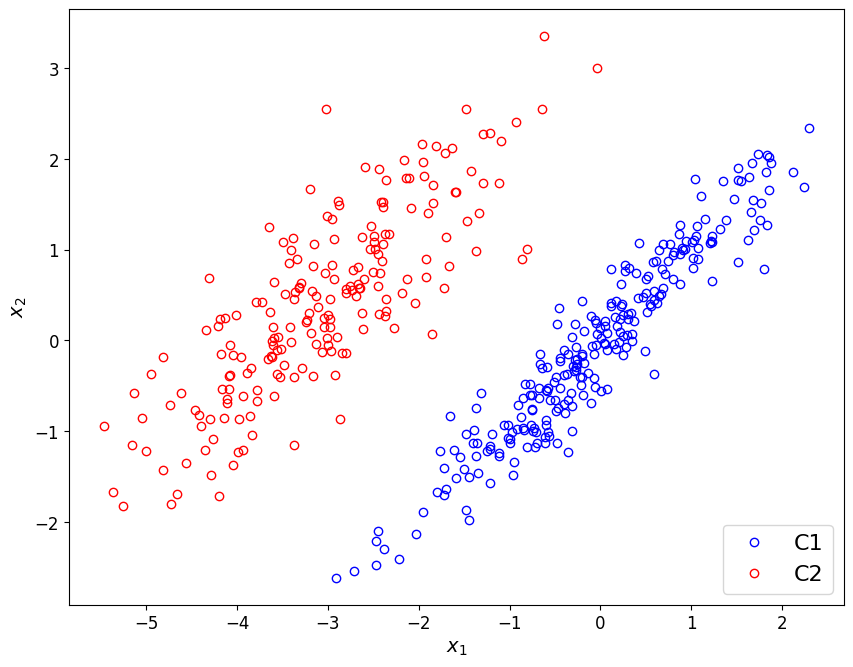

In [72]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [73]:
X = np.hstack([xc1, xc2]).T

tc1 = np.ones(xc1.shape[1])
tc2 = np.zeros(xc2.shape[1])

t = np.concatenate([tc1, tc2]).reshape(-1,1)

In [74]:
def sigmoid(logoddsvec):
    return 1/(1+np.exp(-logoddsvec))

In [75]:
Phi=np.hstack([np.ones(len(X)).reshape(-1,1), X])# matriz de diseño
#print(Phi.shape)
w=[np.ones(3).reshape(-1,1)]#inicializo los pesos
n_iter = 13 #defino el numero de iteraciones con el que voy a jugar
for i in range(n_iter):
  # obtengo los ys iniciales utilizando mis pesos, la matriz de diseño y la funcion de activacion
  y = sigmoid(np.dot(Phi, w[-1]))
  #print(y.shape)
  #R=np.diag(list(map(lambda yy: yy*(1-yy), y[:,0])))#matriz R
  R = np.diag(y[:,0]*(1-y[:,0]))#matriz R
  #print(R.shape)
  aux_matrix = np.linalg.solve(R,(y-t)) #paso auxiliar necesario
  z = np.dot(Phi,w[-1])-aux_matrix #matriz z
  aux_matrix_2 = np.dot(np.dot(Phi.T,R),Phi)
  aux_matrix_3 = np.dot(np.dot(Phi.T,R),z)
  w_aux=np.linalg.solve(aux_matrix_2,aux_matrix_3)
  if(1==1):#criterio de convergencia
    w.append(w_aux)
  else:
    break

Veamos como evolucionan los coeficientes

In [76]:
for w_val in w:
  print(w_val[:,0])

[1. 1. 1.]
[ 2.4404682   1.26402509 -1.91375055]
[ 3.45644332  1.96420953 -2.39061501]
[ 4.46892371  2.6750064  -3.00473299]
[ 5.50669428  3.44641528 -3.73743344]
[ 6.61784433  4.32475323 -4.6323189 ]
[ 7.88477088  5.36036928 -5.7345491 ]
[ 9.37809813  6.57649456 -7.04746665]
[11.11205601  7.95937618 -8.54144841]
[ 13.0623738    9.48246387 -10.18259107]
[ 15.18849171  11.11782682 -11.93793296]
[ 17.44722581  12.83904863 -13.7777448 ]
[ 19.80222713  14.62424842 -15.67896909]
[ 22.22681816  16.4571953  -17.6254591 ]


In [77]:
W = w[-1]
y = sigmoid(np.dot(Phi,W))

# Clasifico como 1 los casos que tienen P(c1 | x) >= 0.5
y_pred = np.where(y>=0.5, 1, 0)


In [78]:
TP = np.sum(t[np.where(y_pred[:,0]==1), 0])
FP = np.sum(1-t[np.where(y_pred[:,0]==1), 0])
TN = np.sum(1-t[np.where(y_pred[:,0]==0), 0])
FN = np.sum(t[np.where(y_pred[:,0]==0), 0])

print(TP, FP, TN, FN)
print((VP+VN)/(VP+FP+VN+FN))

250.0 0.0 200.0 0.0
1.0


In [79]:
def accuracy_score(labels,predictions):
    return np.mean(np.allclose(labels,predictions))

In [80]:
accuracy_score(t,y_pred)

np.float64(1.0)

Otra herramienta invaluable, y que vamos a explorar la clase que viene, es la matriz de confusión. Esta matriz tiene como elemento i-j la cantidad de elementos de la clase i asignados al grupo j.

In [81]:
def confusion_matrix(labels,predictions):
    #  pred0 pred1
    #verdad0  VN  FP
    #verdad1  FN  VP
    TP = np.sum(labels[np.where(predictions[:,0]==1), 0])
    FP = np.sum(1-labels[np.where(predictions[:,0]==1), 0])
    TN = np.sum(1-labels[np.where(predictions[:,0]==0), 0])
    FN = np.sum(labels[np.where(predictions[:,0]==0), 0])
    return np.array([[TN,FP],[FN,TP]])

In [83]:
cf = confusion_matrix(t,y_pred)
print(cf)

[[200.   0.]
 [  0. 250.]]


In [84]:
TN,FP,FN,TP = cf.ravel() 
print(TP,FP,TN,FN)

250.0 0.0 200.0 0.0


Y grafiquemos el resultado junto con la frontera de decisión que maximiza la exactitud

In [85]:
x1 = np.linspace(-6.0,3.0,3)
x2 = np.linspace(-3.0,4.0,2)
X1toplot, X2toplot = np.meshgrid(x1,x2)

#print(x1,x2)
print(X1toplot)
print(X2toplot)
#print(np.c_[X1toplot.ravel(), X2toplot.ravel()])

[[-6.  -1.5  3. ]
 [-6.  -1.5  3. ]]
[[-3. -3. -3.]
 [ 4.  4.  4.]]


/tmp/ipykernel_94519/1656797914.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[x2_ind,x1_ind] = sigmoid(np.dot(W.T,[1.0,x1_val,x2_val]))


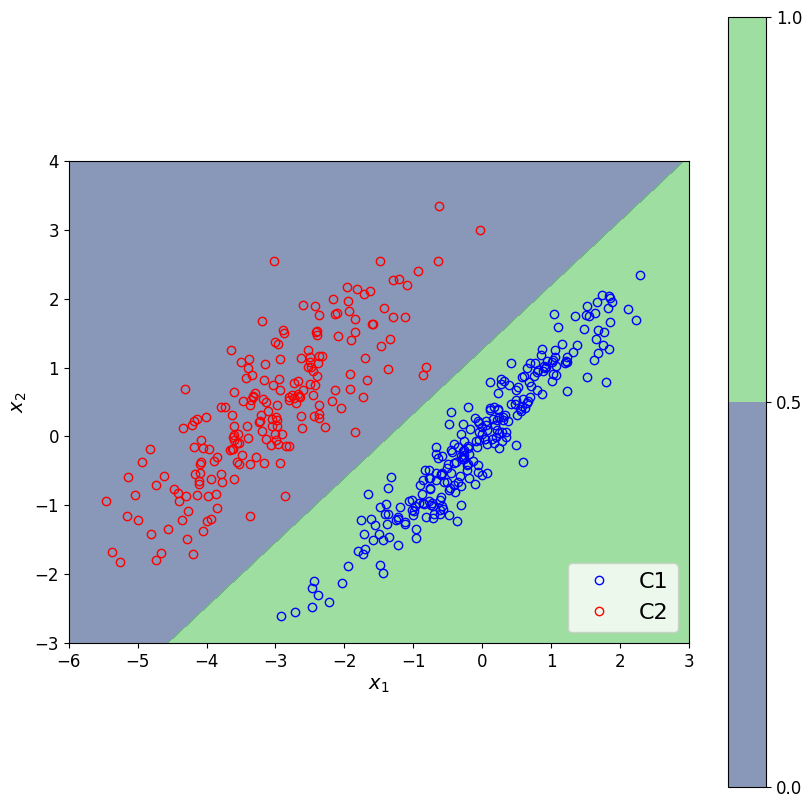

In [87]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)

#X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
#Z=(np.asarray([expit(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

Z = np.zeros((len(x2),len(x1)))
for x2_ind, x2_val in enumerate(x2):
  for x1_ind, x1_val in enumerate(x1):
    Z[x2_ind,x1_ind] = sigmoid(np.dot(W.T,[1.0,x1_val,x2_val]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(x1,x2,Z,levels=[0.0,0.5,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

En este codigo, podemos agregar más valores a los níveles del gráfico para tener una idea de la forma del posterior.

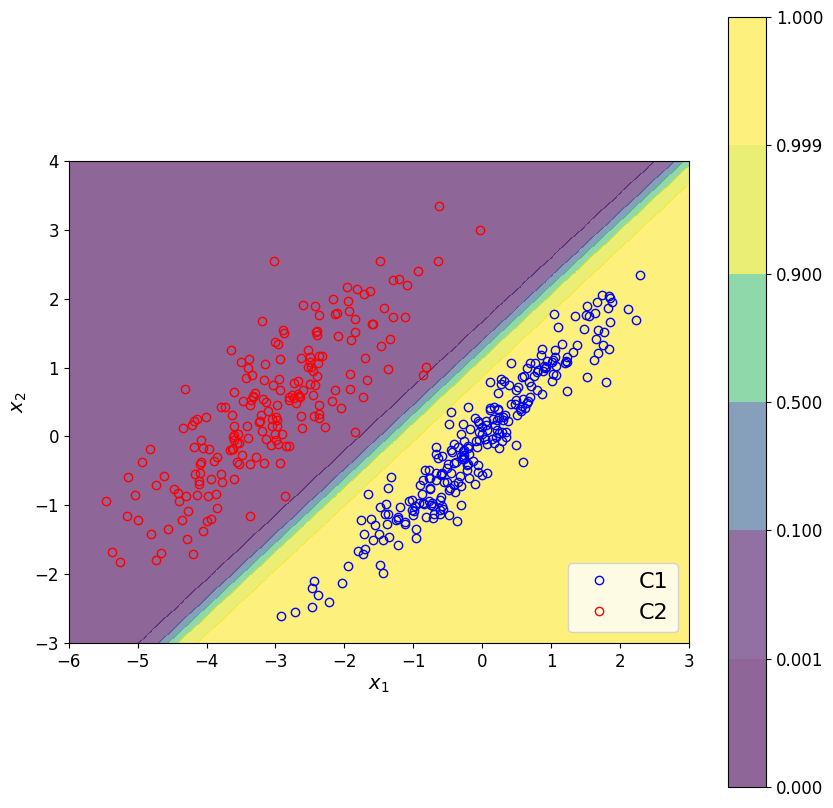

In [89]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)
X1toplot, X2toplot = np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z=(np.asarray([sigmoid(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z,levels=[0.0,0.001,0.1,0.5,0.9,0.999,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [ ]:
class LogisticRegression:

    def init

    def fit:
        
    def predict:
        return 
    def predict_proba:
        return 

### Caso no linealmente separable

In [91]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-1.5, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


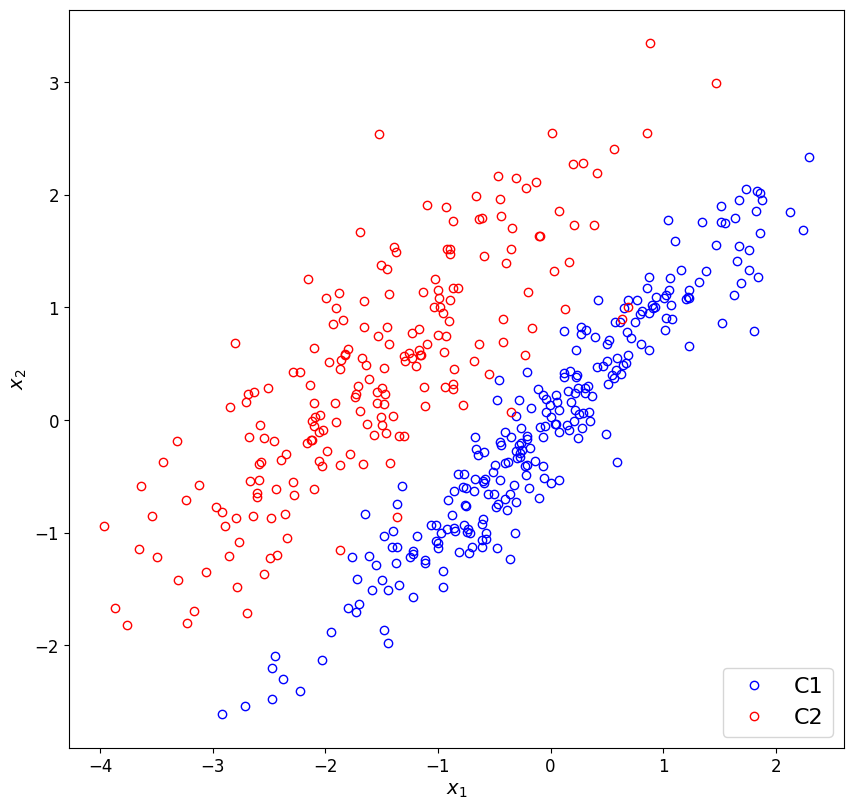

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

## Clustering

## Density Estimation

Gaussian mixture

In [ ]:
def E_step():
    return

def M_step():
    return

def log_likelihood():
    return